In [108]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pylab
from pylab import xticks
import matplotlib.ticker as mtick
from matplotlib.patches import Patch
from matplotlib.ticker import MaxNLocator as mxn
import seaborn as sns
import scipy

In [18]:
path = r'C:\Users\salom\OneDrive\Documentos\11-2025 Instacart Basket Analysis'

In [19]:
# Import aggregated orders and products pkl dataframe

ords_prods = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_aggregated.pkl'))

In [20]:
# Import customers combined pkl dataframe

ords_prods_custs = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customers.pkl'))

In [5]:
# Create a crosstab between the “days_since_prior_order” column and the “order_number” column

crosstab = pd.crosstab(ords_prods['days_since_prior_order'], ords_prods['order_number'], dropna = False)

In [6]:
crosstab.to_clipboard()

In [7]:
# This confirms initial hypothesis that missing values were caused by the fact that there can’t be any days before a first order, and means they can be safely disregarded.

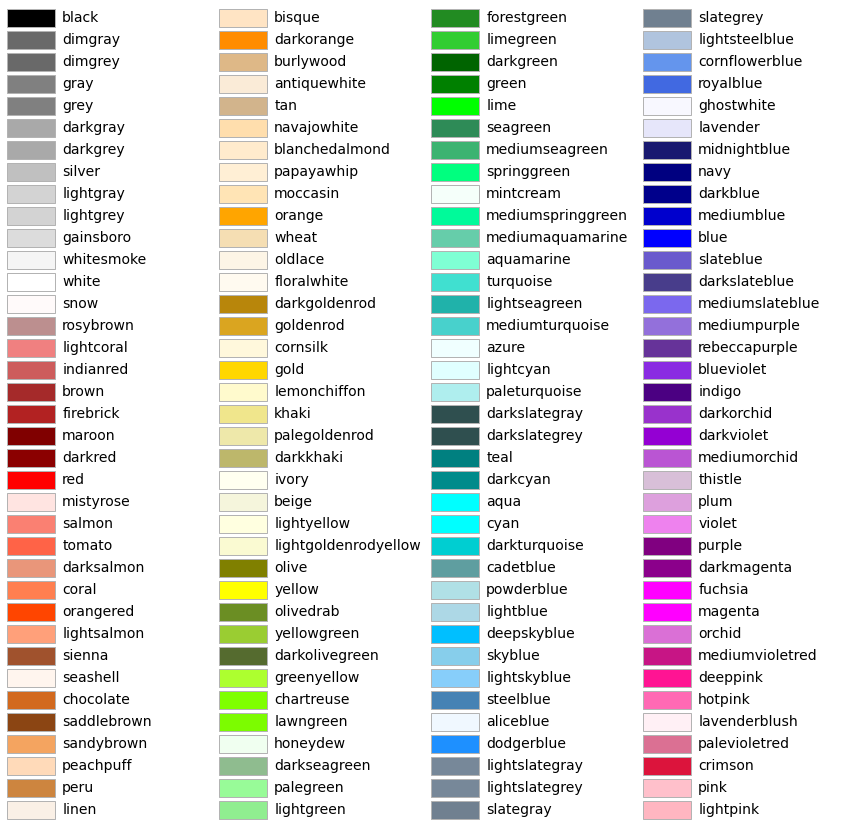

In [109]:
# Visualize color chart

import math
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolors
def plot_colortable(colors, *, ncols=4, sort_colors=True):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        names = sorted(
            colors, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(c))))
    else:
        names = list(colors)

    n = len(names)
    nrows = math.ceil(n / ncols)

    width = cell_width * ncols + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * ncols)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

plot_colortable(mcolors.CSS4_COLORS)
plt.show()

# Exercise Part 1

### Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [6]:
ords_prods_custs.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,avg_price_by_user,spending_flag,avg_days_prior_order,frequency_flag,gender,state,age,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,6.367797,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,3,married,40423
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,6.367797,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,3,married,40423
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,6.367797,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,3,married,40423
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,6.367797,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,3,married,40423
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,6.367797,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,3,married,40423


In [7]:
ords_prods_custs.shape

(32404859, 29)

#### When mergin the dataframes in the past exercise, the first and last name columns were dropped as they did not provide significant insights to our analysis. Utilizing the user_id, which is anonymized, instead of the name, also contributes to enforcing data privacy rules by removing personally identifiable information (PII).

### The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

In [21]:
# Deriving a new region columns from the state column with loc(). Apply regional divisions used by the United States Census Bureau: 
# Region 1 Northeast, Region 2 Midwest, Region 3 South, Region 4 West

ords_prods_custs.loc[ords_prods_custs['state'].isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 
                                                    'New York', 'Pennsylvania', 'New Jersey'
                                                    ]), 'region'] = 'Northeast'

In [22]:
window = ords_prods_custs.loc[ords_prods_custs['state'].isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 
                                                    'New York', 'Pennsylvania', 'New Jersey'
                                                    ])]

In [9]:
window.tail()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,avg_days_prior_order,frequency_flag,gender,state,age,n_dependants,fam_status,income,region
32402733,1909878,206200,23,0,19,1.0,49585,26,1,Organic Refined Coconut Oil,...,Low spender,6.590226,Frequent customer,Male,Connecticut,63,3,married,114331,Northeast
32402734,1909878,206200,23,0,19,1.0,44912,27,0,Baking Powder,...,Low spender,6.590226,Frequent customer,Male,Connecticut,63,3,married,114331,Northeast
32402735,1909878,206200,23,0,19,1.0,18418,28,0,Ginger Ale Soda,...,Low spender,6.590226,Frequent customer,Male,Connecticut,63,3,married,114331,Northeast
32402736,1909878,206200,23,0,19,1.0,46359,29,0,Organic Ground Ginger,...,Low spender,6.590226,Frequent customer,Male,Connecticut,63,3,married,114331,Northeast
32402737,1909878,206200,23,0,19,1.0,17878,30,1,Grilled Chicken Breast Strips,...,Low spender,6.590226,Frequent customer,Male,Connecticut,63,3,married,114331,Northeast


In [23]:
ords_prods_custs.loc[ords_prods_custs['state'].isin(['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio',
                                                     'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri'
                                                    ]), 'region'] = 'Midwest'

In [24]:
ords_prods_custs.loc[ords_prods_custs['state'].isin(['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia',
                                                     'North Carolina', 'South Carolina', 'Georgia', 'Florida',
                                                     'Kentucky', 'Tennessee', 'Mississippi', 'Alabama',
                                                     'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'
                                                    ]), 'region'] = 'South'

In [25]:
ords_prods_custs.loc[ords_prods_custs['state'].isin(['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico',
                                                     'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii'
                                                    ]), 'region'] = 'West'

In [11]:
# Print the frequency of the “region” column

freq_reg = ords_prods_custs.value_counts('region')

In [12]:
freq_reg

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [15]:
ords_prods_custs.shape

(32404859, 30)

In [11]:
cust_by_reg = ords_prods_custs.groupby('region')['user_id'].nunique().reset_index()
cust_by_reg.columns = ['region', 'user_count']
cust_by_reg = cust_by_reg.sort_values('user_count')
cust_by_reg

,region,user_count
1,Northeast,36388
0,Midwest,48519
3,West,52565
2,South,68737


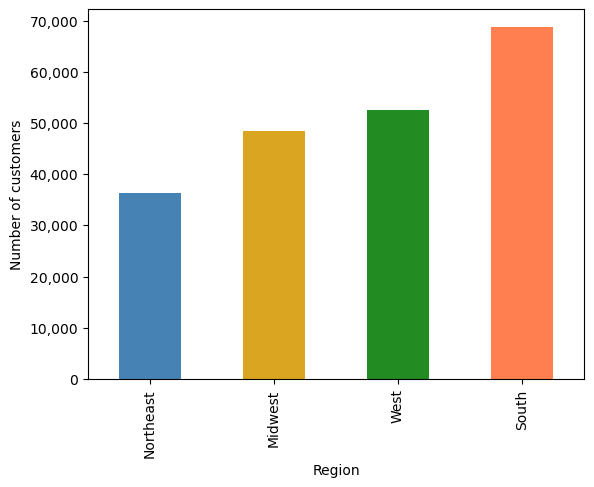

In [12]:
# Create bar chart of customers per region

bar_cust_by_reg = cust_by_reg.plot.bar(
    x='region', y='user_count',
    xlabel='Region',
    ylabel='Number of customers',
    color=['steelblue','goldenrod', 'forestgreen', 'coral']
)
bar_cust_by_reg.get_legend().remove()
bar_cust_by_reg.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))


In [14]:
bar_cust_by_reg.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'custs_by_region.png'), bbox_inches='tight')

#### Determine whether there’s a difference in spending habits between the different U.S. regions.

In [46]:
# Get the mode of 'spending_flag' for each region.

mode_spend_reg = ords_prods_custs.groupby('region')['spending_flag'].agg(pd.Series.mode)
print(mode_spend_reg)

region
Midwest      Low spender
Northeast    Low spender
South        Low spender
West         Low spender
Name: spending_flag, dtype: object


In [47]:
spend_by_region= ords_prods_custs.groupby('region')['spending_flag'].value_counts(normalize=False).reset_index()
spend_by_region.columns = ['region', 'spending_flag', 'cust_count']

In [17]:
spend_by_region

,region,spending_flag,cust_count
0,Midwest,Low spender,7568060
1,Midwest,High spender,29265
2,Northeast,Low spender,5704094
3,Northeast,High spender,18642
4,South,Low spender,10751306
5,South,High spender,40579
6,West,Low spender,8261690
7,West,High spender,31223


In [48]:
spend_by_region_shr= ords_prods_custs.groupby('region')['spending_flag'].value_counts('spending_flag').reset_index()
spend_by_region_shr.columns = ['region', 'spending_flag', 'cust_share']
spend_by_region_shr

,region,spending_flag,cust_share
0,Midwest,Low spender,0.996148
1,Midwest,High spender,0.003852
2,Northeast,Low spender,0.996742
3,Northeast,High spender,0.003258
4,South,Low spender,0.996240
5,South,High spender,0.003760
6,West,Low spender,0.996235
7,West,High spender,0.003765


In [19]:
spend_by_region3 = (
    ords_prods_custs
    .groupby(['region', 'spending_flag'])
    .size()
    .unstack('spending_flag')
)

In [20]:
spend_by_region3

spending_flag,High spender,Low spender
region,,
Midwest,29265,7568060
Northeast,18642,5704094
South,40579,10751306
West,31223,8261690


In [21]:
spend_by_region3_pct = spend_by_region3[['Low spender', 'High spender']].div(spend_by_region3.sum(axis=1), axis=0) * 100

In [22]:
spend_by_region3_pct

spending_flag,Low spender,High spender
region,,
Midwest,99.614799,0.385201
Northeast,99.674247,0.325753
South,99.623986,0.376014
West,99.623498,0.376502


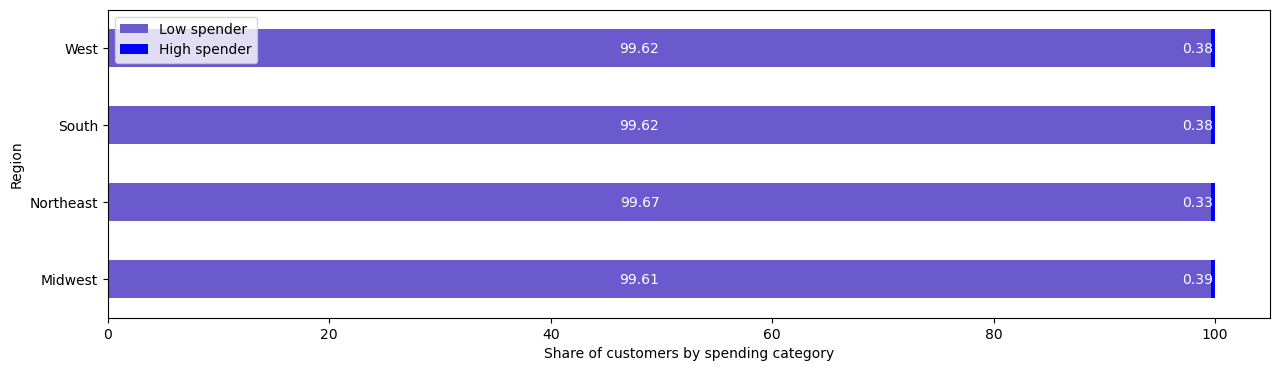

In [37]:
# plot a Stacked Bar Chart

ax = spend_by_region3_pct.plot(kind='barh', stacked=True, figsize=(15, 4), color={'Low spender': 'slateblue', 'High spender': 'blue'}, 
                          xlabel='Share of customers by spending category', ylabel='Region')
plt.legend()
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{width:.2f}'
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # plot only when height is greater than specified value
    if width > 0:
        ax.text(label_x, label_y, label_text, ha='right', va='center', color= 'white', fontsize=10)
        
plt.show()


In [15]:
spend_habits_reg = ords_prods_custs.groupby('region').agg({'order_number': 'mean', 'days_since_prior_order': 'mean', 'prices': 'mean', 'n_dependants': 'mean', 'income': 'mean'}).reset_index()
spend_habits_reg.columns = ['region', 'avg_orders', 'avg_days_btw_ord', 'avg_price', 'avg_dependants', 'avg_income']
spend_habits_reg.to_clipboard()
spend_habits_reg

,region,avg_orders,avg_days_btw_ord,avg_price,avg_dependants,avg_income
0,Midwest,16.925132,11.181836,7.792470,1.491636,100102.262696
1,Northeast,17.215730,11.075769,7.782309,1.504822,99562.865590
2,South,17.150968,11.108108,7.794803,1.503654,99011.116249
3,West,17.279318,11.047196,7.790253,1.506987,99297.765248


### There is not a signifficant difference in spending habits between the different U.S. regions. The majority of customers in all regions are low spenders. 

In [169]:
ax.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'spend_by_region_shr.png'))

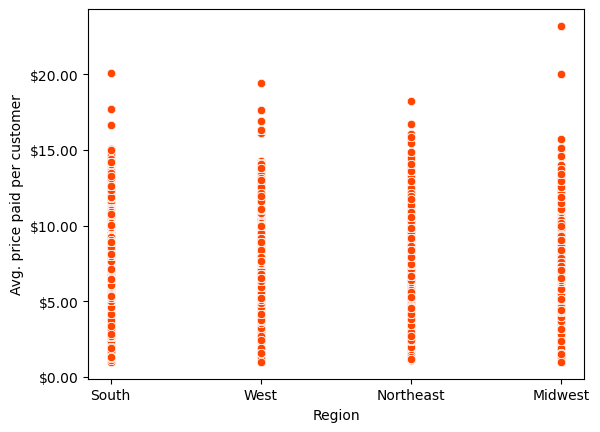

In [168]:
# Create scatterplot of 'avg_price_by_user' per 'region'

corr_spend_region = sns.scatterplot(x = 'region', y = 'avg_price_by_user', data = ords_prods_custs, color='orangered')
corr_spend_region.set_xlabel('Region')
corr_spend_region.set_ylabel('Avg. price paid per customer')
corr_spend_region.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:.2f}'))

In [170]:
corr_spend_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'sctt_spend_region.png'))

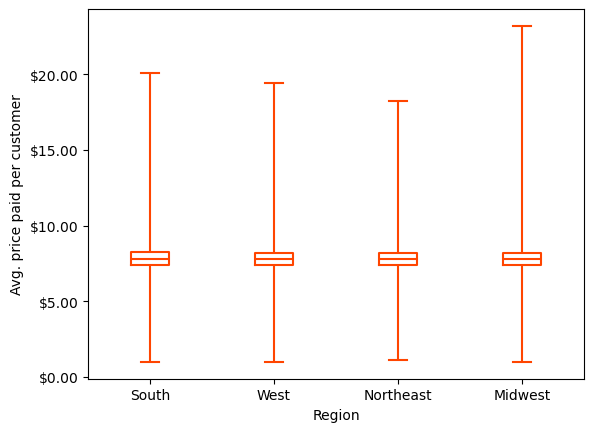

In [41]:
# Create a boxplot of 'avg_price_by_user' per 'region'

bxplt_spend_region = sns.boxplot(
    data=ords_prods_custs,
    x='region',
    y='avg_price_by_user',
    fill=False,
    width=.3,
    whis=(0,100),
    color='orangered'
)
bxplt_spend_region.set_xlabel('Region')
bxplt_spend_region.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:.2f}'))
bxplt_spend_region.set_ylabel('Avg. price paid per customer')
plt.show()

In [42]:
bxplt_spend_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bxplt_spend_region.png'))

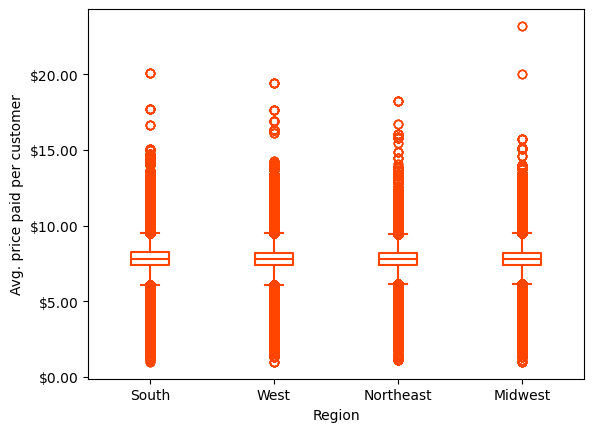

In [43]:
# Create a boxplot of 'avg_price_by_user' per 'region'

bxplt_spend_region2 = sns.boxplot(
    data=ords_prods_custs,
    x='region',
    y='avg_price_by_user',
    fill=False,
    width=.3,
    color='orangered'
)
bxplt_spend_region2.set_xlabel('Region')
bxplt_spend_region2.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:.2f}'))
bxplt_spend_region2.set_ylabel('Avg. price paid per customer')
plt.show()

In [44]:
bxplt_spend_region2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bxplt_spend_region2.png'))

#### While the stacked bar chart shows the share of customers by spending category, a scatterplot show the average price outlier customers pay, and a boxplot shows that the median price paid is similar in all regions.

### The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [26]:
# Create low-activity flag with loc() using 'max_order' column as criteria

ords_prods_custs.loc[ords_prods_custs['max_order'] < 5, 'activity_flag'] = 'Low activity'

In [27]:
ords_prods_custs.loc[ords_prods_custs['max_order'] >= 5, 'activity_flag'] = 'Regular activity'

In [12]:
ords_prods_custs['activity_flag'].describe()

count             32404859
unique                   2
top       Regular activity
freq              30964564
Name: activity_flag, dtype: object

In [28]:
# Create low-activity subset

low_activity =  ords_prods_custs[ords_prods_custs['activity_flag']=='Low activity']

In [27]:
low_activity

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,avg_days_prior_order,frequency_flag,gender,state,age,n_dependants,fam_status,income,region,activity_flag
360,2717275,5,1,3,12,NaN,15349,1,0,Organic Raw Agave Nectar,...,14.500000,Regular customer,Female,California,75,0,divorced/widowed,115242,West,Low activity
361,2717275,5,1,3,12,NaN,21413,2,0,Organic Soba,...,14.500000,Regular customer,Female,California,75,0,divorced/widowed,115242,West,Low activity
362,2717275,5,1,3,12,NaN,48775,3,0,Organic Red Cabbage,...,14.500000,Regular customer,Female,California,75,0,divorced/widowed,115242,West,Low activity
363,2717275,5,1,3,12,NaN,28289,4,0,Organic Shredded Carrots,...,14.500000,Regular customer,Female,California,75,0,divorced/widowed,115242,West,Low activity
364,2717275,5,1,3,12,NaN,8518,5,0,Organic Red Onion,...,14.500000,Regular customer,Female,California,75,0,divorced/widowed,115242,West,Low activity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32403540,414137,206205,3,5,16,10.0,43352,3,1,Raspberries,...,20.666667,Non-frequent customer,Female,Hawaii,38,2,married,99402,West,Low activity
32403541,414137,206205,3,5,16,10.0,3896,4,1,Organic Honey Sweet Whole Wheat Bread,...,20.666667,Non-frequent customer,Female,Hawaii,38,2,married,99402,West,Low activity
32403542,414137,206205,3,5,16,10.0,19173,5,0,Orange Calcium & Vitamin D Pulp Free,...,20.666667,Non-frequent customer,Female,Hawaii,38,2,married,99402,West,Low activity
32403543,414137,206205,3,5,16,10.0,22035,6,1,Organic Whole String Cheese,...,20.666667,Non-frequent customer,Female,Hawaii,38,2,married,99402,West,Low activity


In [50]:
# Export low_activity dataframe

low_activity.to_csv(os.path.join(path, '02 Data','Prepared Data', 'low_activity.csv'))

In [29]:
# Create regular-activity subset

regular_activity =  ords_prods_custs[ords_prods_custs['activity_flag']=='Regular activity']

In [34]:
regular_activity.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,avg_days_prior_order,frequency_flag,gender,state,age,n_dependants,fam_status,income,region,activity_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,20.259259,Non-frequent customer,Female,Alabama,31,3,married,40423,South,Regular activity
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,20.259259,Non-frequent customer,Female,Alabama,31,3,married,40423,South,Regular activity
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,20.259259,Non-frequent customer,Female,Alabama,31,3,married,40423,South,Regular activity
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,20.259259,Non-frequent customer,Female,Alabama,31,3,married,40423,South,Regular activity
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,20.259259,Non-frequent customer,Female,Alabama,31,3,married,40423,South,Regular activity


In [35]:
regular_activity.shape

(30964564, 31)

In [53]:
# Print all column names as an Index object

print(regular_activity.columns)

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_price_by_user', 'spending_flag', 'avg_days_prior_order',
       'frequency_flag', 'gender', 'state', 'age', 'n_dependants',
       'fam_status', 'income', 'activity_flag', 'region'],
      dtype='object')


In [30]:
# Drop 'activity_flag' column, as it is no longer necessary

ords_prods_regcusts = regular_activity.drop(columns = ['activity_flag'])

In [37]:
ords_prods_regcusts.shape

(30964564, 30)

In [56]:
# Export data to pkl

ords_prods_regcusts.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_regcustomers.pkl'))

### The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [55]:
# Create demographics flag with loc()

ords_prods_regcusts.loc[(ords_prods_regcusts['age'] < 35) & (ords_prods_regcusts['gender'] =='Female') & (ords_prods_regcusts['fam_status'].isin(['single', 'divorced/widowed'])) & (ords_prods_regcusts['n_dependants']==0),  'demographics'] = 'Single/div/wid young woman no child'

In [56]:
ords_prods_regcusts.loc[(ords_prods_regcusts['age'] < 35) & (ords_prods_regcusts['gender'] =='Male') & (ords_prods_regcusts['fam_status'].isin(['single', 'divorced/widowed'])) & (ords_prods_regcusts['n_dependants']==0),  'demographics'] = 'Single/div/wid young man no child'

In [57]:
ords_prods_regcusts.loc[(ords_prods_regcusts['age'] < 35) & (ords_prods_regcusts['gender'] =='Female') & (ords_prods_regcusts['fam_status'].isin(['single', 'divorced/widowed'])) & (ords_prods_regcusts['n_dependants']>0),  'demographics'] = 'Single/div/wid young mother'

In [58]:
ords_prods_regcusts.loc[(ords_prods_regcusts['age'] < 35) & (ords_prods_regcusts['gender'] =='Male') & (ords_prods_regcusts['fam_status'].isin(['single', 'divorced/widowed'])) & (ords_prods_regcusts['n_dependants']>0),  'demographics'] = 'Single/div/wid young father'

In [59]:
ords_prods_regcusts.loc[(ords_prods_regcusts['age'] < 35) & (ords_prods_regcusts['fam_status']=='living with parents and siblings') & (ords_prods_regcusts['n_dependants']==0), 'demographics'] = 'Young adult in large household'

In [60]:
ords_prods_regcusts.loc[(ords_prods_regcusts['age'] < 35) & (ords_prods_regcusts['gender'] =='Male') & (ords_prods_regcusts['fam_status']=='living with parents and siblings') & (ords_prods_regcusts['n_dependants']>0), 'demographics'] = 'Young father living with parents'

In [61]:
ords_prods_regcusts.loc[(ords_prods_regcusts['age'] < 35) & (ords_prods_regcusts['gender'] =='Female') & (ords_prods_regcusts['fam_status']=='living with parents and siblings') & (ords_prods_regcusts['n_dependants']>0), 'demographics'] = 'Young mother living with parents'

In [62]:
ords_prods_regcusts.loc[(ords_prods_regcusts['age'] < 35) & (ords_prods_regcusts['gender'] =='Female') & (ords_prods_regcusts['fam_status']=='married') & (ords_prods_regcusts['n_dependants']>0),  'demographics'] = 'Married young mother'

In [63]:
ords_prods_regcusts.loc[(ords_prods_regcusts['age'] < 35) & (ords_prods_regcusts['gender'] =='Male') & (ords_prods_regcusts['fam_status']=='married') & (ords_prods_regcusts['n_dependants']>0),  'demographics'] = 'Married young father'

In [64]:
ords_prods_regcusts.loc[(ords_prods_regcusts['age'] >= 35) & (ords_prods_regcusts['age'] < 65) & (ords_prods_regcusts['gender'] =='Female') & (ords_prods_regcusts['fam_status']=='married') & (ords_prods_regcusts['n_dependants']>0),  'demographics'] = 'Married adult mother'

In [65]:
ords_prods_regcusts.loc[(ords_prods_regcusts['age'] >= 35) & (ords_prods_regcusts['age'] < 65) & (ords_prods_regcusts['gender'] =='Male') & (ords_prods_regcusts['fam_status']=='married') & (ords_prods_regcusts['n_dependants']>0),  'demographics'] = 'Married adult father'

In [66]:
ords_prods_regcusts.loc[(ords_prods_regcusts['age'] >= 35) & (ords_prods_regcusts['age'] < 65) & (ords_prods_regcusts['gender'] =='Female') & (ords_prods_regcusts['fam_status'].isin(['single', 'divorced/widowed'])) & (ords_prods_regcusts['n_dependants']>0),  'demographics'] = 'Single/div/wid adult mother'

In [67]:
ords_prods_regcusts.loc[(ords_prods_regcusts['age'] >= 35) & (ords_prods_regcusts['age'] < 65) & (ords_prods_regcusts['gender'] =='Male') & (ords_prods_regcusts['fam_status'].isin(['single', 'divorced/widowed'])) & (ords_prods_regcusts['n_dependants']>0),  'demographics'] = 'Single/div/wid adult father'

In [68]:
ords_prods_regcusts.loc[(ords_prods_regcusts['age'] >= 35) & (ords_prods_regcusts['age'] < 65) & (ords_prods_regcusts['gender'] =='Female') & (ords_prods_regcusts['fam_status'].isin(['single', 'divorced/widowed'])) & (ords_prods_regcusts['n_dependants']==0),  'demographics'] = 'Single/div/wid adult woman no child'

In [69]:
ords_prods_regcusts.loc[(ords_prods_regcusts['age'] >= 35) & (ords_prods_regcusts['age'] < 65) & (ords_prods_regcusts['gender'] =='Male') & (ords_prods_regcusts['fam_status'].isin(['single', 'divorced/widowed'])) & (ords_prods_regcusts['n_dependants']==0),  'demographics'] = 'Single/div/wid adult man no child'

In [70]:
ords_prods_regcusts.loc[(ords_prods_regcusts['age'] >= 65) & (ords_prods_regcusts['fam_status']=='married') & (ords_prods_regcusts['gender'] =='Female'),  'demographics'] = 'Married older woman'

In [71]:
ords_prods_regcusts.loc[(ords_prods_regcusts['age'] >= 65) & (ords_prods_regcusts['fam_status']=='married') & (ords_prods_regcusts['gender'] =='Male'),  'demographics'] = 'Married older man'

In [72]:
ords_prods_regcusts.loc[(ords_prods_regcusts['age'] >= 65) & (ords_prods_regcusts['fam_status'].isin(['single', 'divorced/widowed'])) & (ords_prods_regcusts['gender'] =='Female'),  'demographics'] = 'Single/div/widow older woman'

In [73]:
ords_prods_regcusts.loc[(ords_prods_regcusts['age'] >= 65) & (ords_prods_regcusts['fam_status'].isin(['single', 'divorced/widowed'])) & (ords_prods_regcusts['gender'] =='Male'),  'demographics'] = 'Single/div/widow older man'

In [74]:
ords_prods_regcusts['demographics'].value_counts(dropna=False)

demographics
Married adult father                   5470412
Married adult mother                   5402148
Married older man                      3106810
Married older woman                    3066776
Married young father                   2370524
Married young mother                   2327041
Single/div/wid adult man no child      1829290
Single/div/wid adult woman no child    1824875
Single/div/wid young man no child      1051586
Single/div/widow older woman           1021436
Single/div/wid young woman no child    1011972
Single/div/widow older man             1000522
Young father living with parents        757596
Young mother living with parents        723576
Name: count, dtype: int64

In [38]:
# Get the mode of 'product_name' for each demographic.

mode_product_dem = ords_prods_regcusts.groupby('demographics')['product_name'].agg(pd.Series.mode)
print(mode_product_dem)

demographics
Married adult father                   Banana
Married adult mother                   Banana
Married older man                      Banana
Married older woman                    Banana
Married young father                   Banana
Married young mother                   Banana
Single/div/wid adult man no child      Banana
Single/div/wid adult woman no child    Banana
Single/div/wid young man no child      Banana
Single/div/wid young woman no child    Banana
Single/div/widow older man             Banana
Single/div/widow older woman           Banana
Young father living with parents       Banana
Young mother living with parents       Banana
Name: product_name, dtype: object


In [39]:
# Export data to pkl

ords_prods_regcusts.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_regcustomers_dem.pkl'))

In [38]:
ords_prods_regcusts.shape

(30964564, 31)

In [39]:
demographics_df = ords_prods_regcusts.groupby('demographics')

In [40]:
pd.options.display.max_columns = None
demographics_df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price_by_user,spending_flag,avg_days_prior_order,frequency_flag,gender,state,age,n_dependants,fam_status,income,region,demographics
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,3,married,40423,South,Married young mother
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,3,married,40423,South,Married young mother
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,4.4,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,3,married,40423,South,Married young mother
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,3,married,40423,South,Married young mother
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,3,married,40423,South,Married young mother
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10090,609104,78,1,1,19,NaN,23687,1,0,Multi Grain Sandwich Thins,43,3,4.5,Low-range product,Regularly busy,Busiest days,Average orders,6,New customer,8.387805,Low spender,24.333333,Non-frequent customer,Female,New York,18,2,living with parents and siblings,95425,Northeast,Young mother living with parents
10091,609104,78,1,1,19,NaN,48290,2,0,Creamy Swiss Garlic & Herb Spreadable Cheese W...,21,16,9.9,Mid-range product,Regularly busy,Busiest days,Average orders,6,New customer,8.387805,Low spender,24.333333,Non-frequent customer,Female,New York,18,2,living with parents and siblings,95425,Northeast,Young mother living with parents
10092,843529,78,2,6,10,5.0,23687,1,1,Multi Grain Sandwich Thins,43,3,4.5,Low-range product,Regularly busy,Regularly busy,Most orders,6,New customer,8.387805,Low spender,24.333333,Non-frequent customer,Female,New York,18,2,living with parents and siblings,95425,Northeast,Young mother living with parents
10093,85768,78,3,0,8,8.0,9387,1,0,Granny Smith Apples,24,4,8.8,Mid-range product,Busiest day,Busiest days,Average orders,6,New customer,8.387805,Low spender,24.333333,Non-frequent customer,Female,New York,18,2,living with parents and siblings,95425,Northeast,Young mother living with parents


In [42]:
demographics_df2 = ords_prods_regcusts.groupby('demographics')['region'].value_counts(normalize=False).reset_index()
demographics_df2.columns = ['demographics', 'region', 'order_count']

In [43]:
demographics_df2

,demographics,region,order_count
0,Married adult father,South,1823855
1,Married adult father,West,1378852
2,Married adult father,Midwest,1271619
3,Married adult father,Northeast,996086
4,Married adult mother,South,1781149
5,Married adult mother,West,1409461
6,Married adult mother,Midwest,1288012
7,Married adult mother,Northeast,923526
8,Married older man,South,1022817
9,Married older man,West,783180


In [44]:
demographics_df3 = ords_prods_regcusts.groupby(['demographics', 'region'])['user_id'].nunique().reset_index()
demographics_df3.columns = ['demographics', 'region', 'user_count']
demographics_df3

,demographics,region,user_count
0,Married adult father,Midwest,6774
1,Married adult father,Northeast,5173
2,Married adult father,South,9554
3,Married adult father,West,7304
4,Married adult mother,Midwest,6761
5,Married adult mother,Northeast,4962
6,Married adult mother,South,9471
7,Married adult mother,West,7139
8,Married older man,Midwest,3906
9,Married older man,Northeast,2930


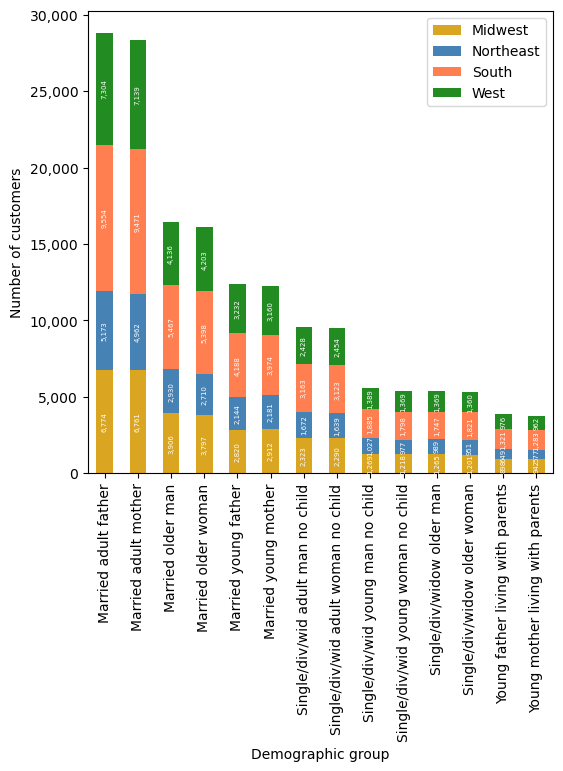

In [46]:
# plot a Stacked Bar Chart for the number of customers per demographic and region

plot_stck_dem = demographics_df3.pivot(index='demographics',
                                 columns='region',
                                 values='user_count')
                                      
ax = plot_stck_dem.plot(
    kind='bar',
    stacked=True,
    figsize=(6, 6),
    xlabel='Demographic group',
    ylabel='Number of customers',
    color=['goldenrod','steelblue', 'coral', 'forestgreen']
)

ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.legend()

for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{height:,.0f}'
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # plot only when height is greater than specified value
    if width > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', color= 'white', fontsize=5, rotation=90)
        
plt.show()


In [47]:
ax.figure.savefig((os.path.join(path, '04 Analysis','Visualizations', 'stacked_custs_dem_region.png')), bbox_inches='tight')

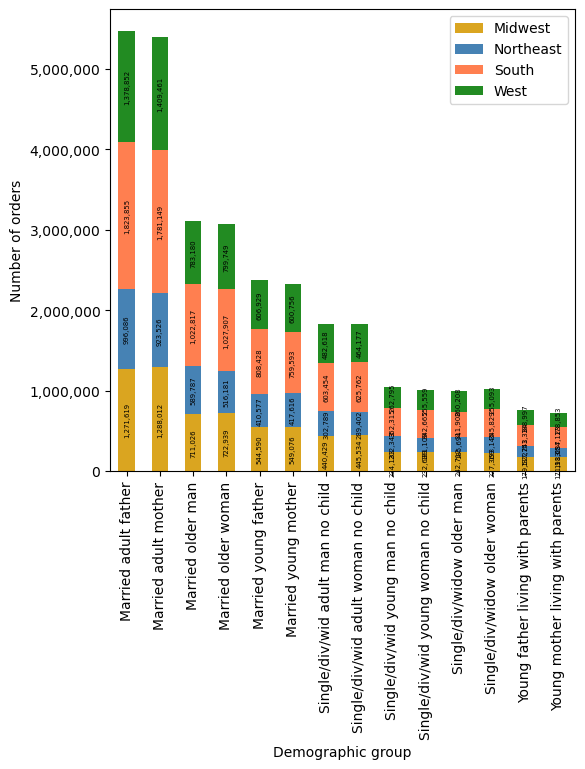

In [48]:
# plot a Stacked Bar Chart for the number of orders per demographic and region

plot_stck_ords_dem = demographics_df2.pivot(index='demographics',
                                 columns='region',
                                 values='order_count')
                                      
ax = plot_stck_ords_dem.plot(
    kind='bar',
    stacked=True,
    figsize=(6, 6),
    xlabel='Demographic group',
    ylabel='Number of orders',
    color=['goldenrod','steelblue', 'coral', 'forestgreen']
)
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.legend()

for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{height:,.0f}'
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # plot only when height is greater than specified value
    if width > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', color= 'black', fontsize=5, rotation=90)
        
plt.show()


In [49]:
ax.figure.savefig((os.path.join(path, '04 Analysis','Visualizations', 'stacked_ords_dem_region.png')), bbox_inches='tight')

#### Gender does not impact significantly the distribution of customers and orders by demographics and region. Married parents accross all ages are the largest groups of customers. 

In [50]:
demographics_merged = demographics_df3.merge(demographics_df2, on = ('demographics', 'region'))
demographics_merged

,demographics,region,user_count,order_count
0,Married adult father,Midwest,6774,1271619
1,Married adult father,Northeast,5173,996086
2,Married adult father,South,9554,1823855
3,Married adult father,West,7304,1378852
4,Married adult mother,Midwest,6761,1288012
5,Married adult mother,Northeast,4962,923526
6,Married adult mother,South,9471,1781149
7,Married adult mother,West,7139,1409461
8,Married older man,Midwest,3906,711026
9,Married older man,Northeast,2930,589787


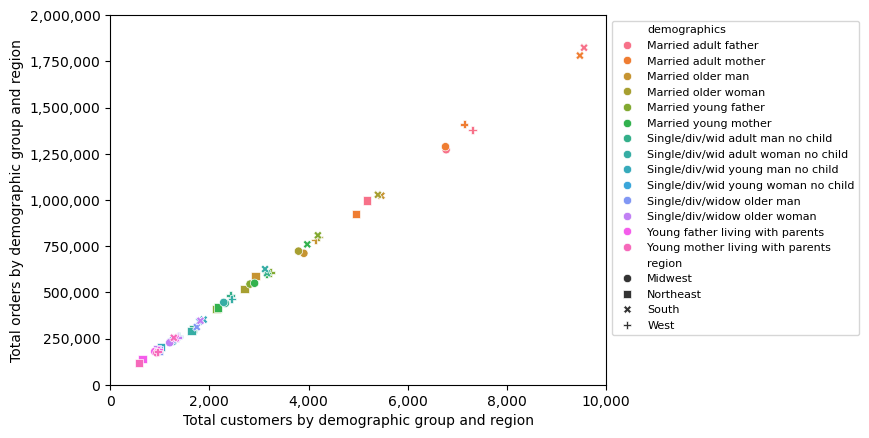

In [56]:
# Create a scatterplot for customers vs orders

markers = {'Midwest': 'o', 'Northeast': 's', 'South': 'X', 'West': 'P'}

scatt_cust_ords_dem = sns.scatterplot(
    data = demographics_merged,
    x= 'user_count',
    y= 'order_count',
    hue='demographics',
    style='region',
    markers=markers
)
sns.move_legend(scatt_cust_ords_dem, "upper left", fontsize=8, bbox_to_anchor=(1, 1))
plt.xlim(0,10000)
plt.ylim(0,2000000)
scatt_cust_ords_dem.set_xlabel('Total customers by demographic group and region')
scatt_cust_ords_dem.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
scatt_cust_ords_dem.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
scatt_cust_ords_dem.set_ylabel('Total orders by demographic group and region')
plt.show()

In [57]:
scatt_cust_ords_dem.figure.savefig((os.path.join(path, '04 Analysis','Visualizations', 'scatt_ords_custs_dem_region.png')), bbox_inches='tight')

#### Customer in all regions have similar purchasing behaviors, placing in average the same amount of orders. Married parents from the South are the largest customer group.

### Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [58]:
# Get the max, mean, and min variables for 'days_since_prior_order' for each demographic.

ords_prods_regcusts.groupby('demographics').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                                      mean  min   max
demographics                                                         
Married adult father                             10.860045  0.0  30.0
Married adult mother                             10.810794  0.0  30.0
Married older man                                10.829879  0.0  30.0
Married older woman                              10.768569  0.0  30.0
Married young father                             10.761329  0.0  30.0
Married young mother                             10.869809  0.0  30.0
Single/div/wid adult man no child                10.739698  0.0  30.0
Single/div/wid adult woman no child              10.752922  0.0  30.0
Single/div/wid young man no child                10.920124  0.0  30.0
Single/div/wid young woman no child              10.870592  0.0  30.0
Single/div/widow older man                       10.899984  0.0  30.0
Single/div/widow older woman                     10.639917  0.0  30.0
Young father living with parents                 10.747496  0.0  30.0
Young mother living with parents                 10.754656  0.0  30.0

In [59]:
ords_prods_regcusts.groupby('demographics')['prices'].describe()

,count,mean,std,min,25%,50%,75%,max
demographics,,,,,,,,
Married adult father,5470412.0,7.799271,4.247000,1.0,4.2,7.4,11.3,25.0
Married adult mother,5402148.0,7.782945,4.234987,1.0,4.2,7.4,11.2,25.0
Married older man,3106810.0,7.795898,4.244122,1.0,4.2,7.4,11.3,25.0
Married older woman,3066776.0,7.793862,4.248504,1.0,4.2,7.4,11.3,25.0
Married young father,2370524.0,7.779031,4.240248,1.0,4.2,7.4,11.2,25.0
Married young mother,2327041.0,7.784353,4.239340,1.0,4.2,7.3,11.2,25.0
Single/div/wid adult man no child,1829290.0,7.781588,4.233849,1.0,4.2,7.4,11.2,25.0
Single/div/wid adult woman no child,1824875.0,7.793203,4.229795,1.0,4.2,7.4,11.3,25.0
Single/div/wid young man no child,1051586.0,7.780172,4.230747,1.0,4.2,7.3,11.2,25.0


C:\Users\salom\AppData\Local\Temp\ipykernel_16932\1479920685.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bxplt_spend_dem.set_xticklabels(bxplt_spend_dem.get_xticklabels(), rotation=90, fontsize=9)


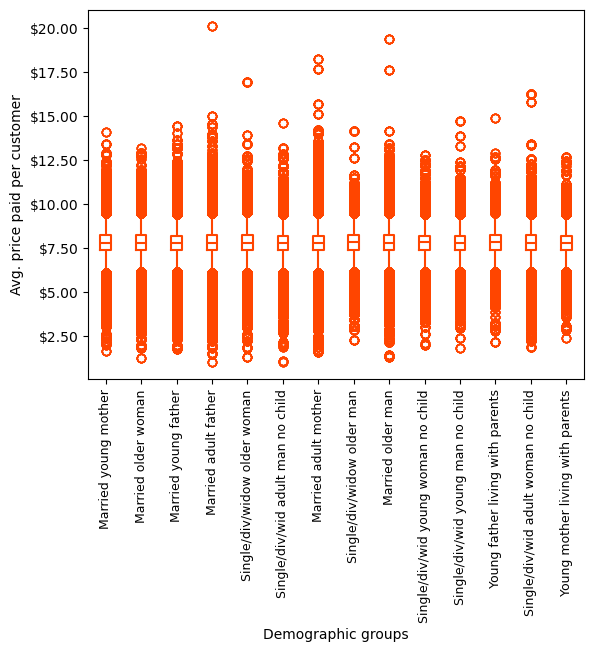

In [217]:
# Create a boxplot of 'avg_price_by_user' per 'demographics'

bxplt_spend_dem = sns.boxplot(
    data=ords_prods_regcusts,
    x='demographics',
    y='avg_price_by_user',
    fill=False,
    width=.3,
    color='orangered',
)
bxplt_spend_dem.set_xlabel('Demographic groups')
bxplt_spend_dem.set_xticklabels(bxplt_spend_dem.get_xticklabels(), rotation=90, fontsize=9)
bxplt_spend_dem.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:.2f}'))
bxplt_spend_dem.set_ylabel('Avg. price paid per customer')
plt.show()

In [218]:
bxplt_spend_dem.figure.savefig((os.path.join(path, '04 Analysis','Visualizations', 'bxplt_spend_dem.png')), bbox_inches='tight')

In [61]:
ords_prods_regcusts.groupby('demographics').agg({'income': ['mean', 'min', 'max']})

income               
                                              mean    min     max
demographics                                                     
Married adult father                 106602.782145  26116  592409
Married adult mother                 107288.585473  25941  591089
Married older man                    115152.345843  29040  593901
Married older woman                  116331.421367  29001  579169
Married young father                  70244.881095  26026  392552
Married young mother                  70687.651239  25911  382720
Single/div/wid adult man no child    107096.863957  25903  578251
Single/div/wid adult woman no child  107596.489923  26170  584097
Single/div/wid young man no child     70724.373948  25991  385324
Single/div/wid young woman no child   70589.163741  25979  387860
Single/div/widow older man           117410.702778  29011  576876
Single/div/widow older woman         115160.424358  29229  509944
Young father living with parents      70593.209663  26024  319983
Young mother living with parents      71160.631733  25937  396364

In [62]:
# Create a dataframe with avg_income and total_spent to compare demographic groups spending

ords_income_by_dem = ords_prods_regcusts.groupby('demographics').agg({'income':['mean', 'std'],'prices':['mean', 'std']})
ords_income_by_dem.reset_index()
ords_income_by_dem.columns = ['avg_income', 'std_income', 'avg_price', 'std_price']
ords_income_by_dem

,avg_income,std_income,avg_price,std_price
demographics,,,,
Married adult father,106602.782145,43236.953117,7.799271,4.247000
Married adult mother,107288.585473,43950.531138,7.782945,4.234987
Married older man,115152.345843,43499.792785,7.795898,4.244122
Married older woman,116331.421367,41547.226469,7.793862,4.248504
Married young father,70244.881095,24489.851772,7.779031,4.240248
Married young mother,70687.651239,26162.211424,7.784353,4.239340
Single/div/wid adult man no child,107096.863957,43821.102079,7.781588,4.233849
Single/div/wid adult woman no child,107596.489923,45196.088211,7.793203,4.229795
Single/div/wid young man no child,70724.373948,25554.218993,7.780172,4.230747


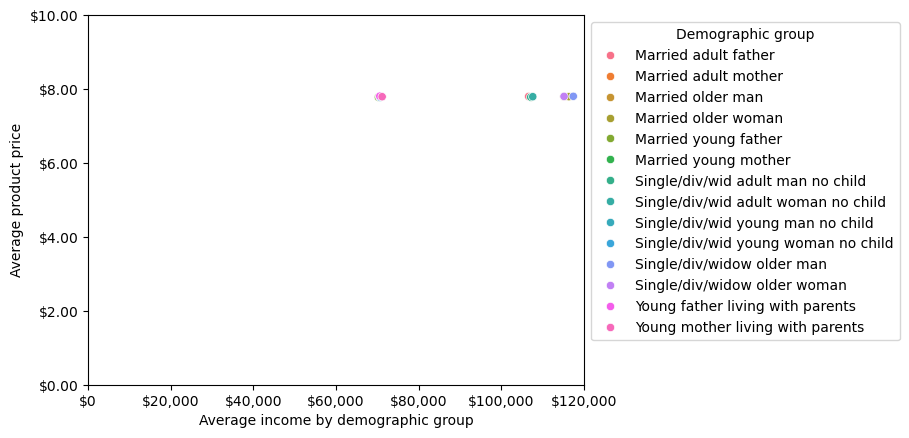

In [63]:
# Create a scatterplot for avg

scatt_incom_dem = sns.scatterplot(
    data=ords_income_by_dem,
    x='avg_income',
    y='avg_price',
    hue='demographics'
)
sns.color_palette("pastel", 10)
scatt_incom_dem.legend(title='Demographic group')
sns.move_legend(scatt_incom_dem, "upper left", bbox_to_anchor=(1, 1))
plt.xlim(0,120000)
plt.ylim(0,10)
scatt_incom_dem.set_xlabel('Average income by demographic group')
scatt_incom_dem.xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
scatt_incom_dem.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:.2f}'))
scatt_incom_dem.set_ylabel('Average product price')
plt.show()

In [64]:
scatt_incom_dem.figure.savefig((os.path.join(path, '04 Analysis','Visualizations', 'scatt_incom_dem.png')), bbox_inches='tight')

### Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

### Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders.

In [208]:
# Get the mode of 'product_name' for each demographic.

crosstab_prods = ords_prods_regcusts.groupby(['demographics','region'])['product_name'].agg(pd.Series.mode)
crosstab_prods.to_clipboard()
crosstab_prods

demographics                         region   
Married adult father                 Midwest                      Banana
                                     Northeast                    Banana
                                     South                        Banana
                                     West                         Banana
Married adult mother                 Midwest                      Banana
                                     Northeast                    Banana
                                     South                        Banana
                                     West                         Banana
Married older man                    Midwest                      Banana
                                     Northeast                    Banana
                                     South                        Banana
                                     West                         Banana
Married older woman                  Midwest                      Banana
    

In [78]:
# Get the mode of 'product_name' for each department by demographic.

pd.set_option('display.max_rows', 294)
prods_by_dep_dem = (ords_prods_regcusts
                    .groupby(['demographics', 'department_id'])['product_name']
                    .agg(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else np.nan)).reset_index()
prods_by_dep_dem.columns= ['demographics', 'department_id','top_product']
prods_by_dep_dem

,demographics,department_id,top_product
0,Married adult father,1,Blueberries
1,Married adult father,2,Roasted Almond Butter
2,Married adult father,3,100% Whole Wheat Bread
3,Married adult father,4,Banana
4,Married adult father,5,Sauvignon Blanc
5,Married adult father,6,Organic Sea Salt Roasted Seaweed Snacks
6,Married adult father,7,Sparkling Water Grapefruit
7,Married adult father,8,Grain Free Chicken Formula Cat Food
8,Married adult father,9,Marinara Sauce
9,Married adult father,10,Dried Mango


In [80]:
# Import departments dataframe to merge with top products

df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)
df_dept.reset_index()
df_dept.columns = ['department_id', 'department_name']
df_dept

,department_id,department_name
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [81]:
# Merge products with department dataframe

prods_by_dep_dem2 = pd.merge(prods_by_dep_dem, df_dept, on = 'department_id')
prods_by_dep_dem2

,demographics,department_id,top_product,department_name
0,Married adult father,1,Blueberries,frozen
1,Married adult father,2,Roasted Almond Butter,other
2,Married adult father,3,100% Whole Wheat Bread,bakery
3,Married adult father,4,Banana,produce
4,Married adult father,5,Sauvignon Blanc,alcohol
5,Married adult father,6,Organic Sea Salt Roasted Seaweed Snacks,international
6,Married adult father,7,Sparkling Water Grapefruit,beverages
7,Married adult father,8,Grain Free Chicken Formula Cat Food,pets
8,Married adult father,9,Marinara Sauce,dry goods pasta
9,Married adult father,10,Dried Mango,bulk


In [83]:
alcohol_by_dem = prods_by_dep_dem2[prods_by_dep_dem2['department_name']=='alcohol']
alcohol_by_dem

,demographics,department_id,top_product,department_name
4,Married adult father,5,Sauvignon Blanc,alcohol
25,Married adult mother,5,Sauvignon Blanc,alcohol
46,Married older man,5,Sauvignon Blanc,alcohol
67,Married older woman,5,Sauvignon Blanc,alcohol
88,Married young father,5,Sauvignon Blanc,alcohol
109,Married young mother,5,Sauvignon Blanc,alcohol
130,Single/div/wid adult man no child,5,Chardonnay,alcohol
151,Single/div/wid adult woman no child,5,Sauvignon Blanc,alcohol
172,Single/div/wid young man no child,5,Cabernet Sauvignon,alcohol
193,Single/div/wid young woman no child,5,Vodka,alcohol


In [143]:
# Calculate what percentage of all demographics that prefer the most purchased products by department

top_prods_by_dep = prods_by_dep_dem.groupby('top_product')['department_id'].value_counts(normalize=False).reset_index()
top_prods_by_dep.columns = ['top_product','department_id', 'dem_group_fav']
top_prods_by_dep['dem_group_fav'] = top_prods_by_dep['dem_group_fav'] * 100/14
top_prods_by_dep = top_prods_by_dep.sort_values(['department_id','dem_group_fav'], ascending=[False,False])
top_prods_by_dep

,top_product,department_id,dem_group_fav
22,Organic Riced Cauliflower,21,100.000000
27,Original Hummus,20,100.000000
19,Lightly Salted Baked Snap Pea Crisps,19,100.000000
2,Baby Food Stage 2 Blueberry Pear & Purple Carrot,18,78.571429
12,Gluten Free SpongeBob Spinach Littles,18,14.285714
33,Spinach Peas & Pear Stage 2 Baby Food,18,7.142857
0,100% Recycled Paper Towels,17,100.000000
25,Organic Whole Milk,16,100.000000
21,Organic Black Beans,15,100.000000
15,Honey Nut Cheerios,14,100.000000


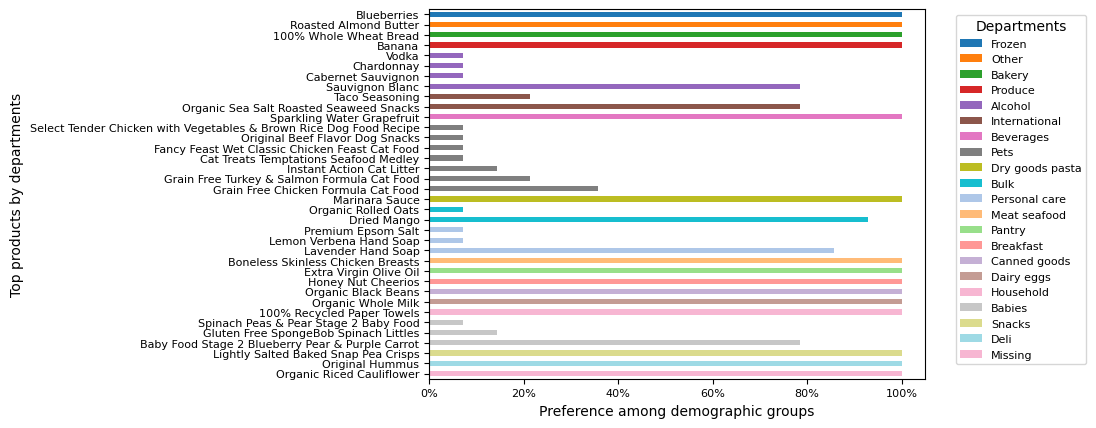

In [145]:
# Create bar chart of top product by department

# Map department_id to colors
dept_colors = {1:'#1f77b4', 2:'#ff7f0e', 3:'#2ca02c', 4:'#d62728', 5:'#9467bd',
    6:'#8c564b', 7:'#e377c2', 8:'#7f7f7f', 9:'#bcbd22', 10:'#17becf',
    11:'#aec7e8', 12:'#ffbb78', 13:'#98df8a', 14:'#ff9896', 15:'#c5b0d5',
    16:'#c49c94', 17:'#f7b6d2', 18:'#c7c7c7', 19:'#dbdb8d', 20:'#9edae5',
    21:'#f7b6d2'}
colors = [dept_colors[row['department_id']] for _, row in top_prods_by_dep.iterrows()]

dept_names = {1:'Frozen', 2:'Other', 3:'Bakery', 4:'Produce', 5:'Alcohol',
    6:'International', 7:'Beverages', 8:'Pets', 9:'Dry goods pasta', 10:'Bulk',
    11:'Personal care', 12:'Meat seafood', 13:'Pantry', 14:'Breakfast', 15:'Canned goods',
    16:'Dairy eggs', 17:'Household', 18:'Babies', 19:'Snacks', 20:'Deli',
    21:'Missing'}

bar_prods_by_dep_dem = top_prods_by_dep.plot.barh(
    x='top_product', y='dem_group_fav',
    ylabel='Top products by departments', fontsize=8,
    xlabel='Preference by demographic groups',
    color=colors)      

bar_prods_by_dep_dem.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:.0f}'))

# Create legend with department NAMES
depts = sorted(top_prods_by_dep['department_id'].unique())
handles = [Patch(facecolor=dept_colors[dept], label=dept_names[dept]) for dept in depts]

plt.legend(handles=handles, title='Departments', bbox_to_anchor=(1.05, 1), fontsize=8 loc='upper left')
plt.show()

#### The following products are the most common purchase by department for all demographics: 
##### - Blueberries (frozen)
##### - Roasted Almond Butter (other)
##### - 100% Whole Wheat Bread (bakery)
##### - Banana (produce)
##### - Sparkling Water Grapefruit (beverages)
##### - Lightly Salted Baked Snap Pea Crisps (snacks)
##### - Marinara Sauce (dry goods pasta)
##### - Boneless Skinless Chicken Breasts (meat seafood)
##### - Extra Virgin Olive Oil (pantry)
##### - 100% Recycled Paper Towels (household)
##### - Organic Whole Milk (dairy eggs)
##### - Organic Black Beans (canned goods)
##### - Honey Nut Cheerios (breakfast)
##### - Organic Riced Cauliflower (missing)
##### - Original Hummus (deli)

In [146]:
bar_prods_by_dep_dem.figure.savefig((os.path.join(path, '04 Analysis','Visualizations', 'bar_prods_by_dep_dem.png')), bbox_inches='tight')

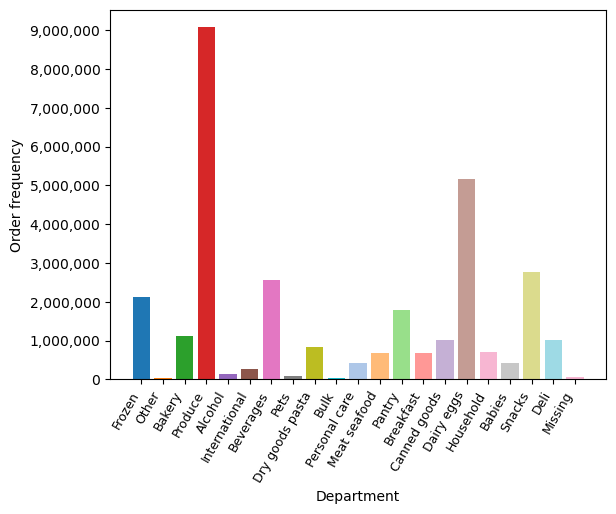

In [110]:
# Create a bar chart for order frequency by department

dept_colors = {1:'#1f77b4', 2:'#ff7f0e', 3:'#2ca02c', 4:'#d62728', 5:'#9467bd',
               6:'#8c564b', 7:'#e377c2', 8:'#7f7f7f', 9:'#bcbd22', 10:'#17becf',
               11:'#aec7e8', 12:'#ffbb78', 13:'#98df8a', 14:'#ff9896', 15:'#c5b0d5',
               16:'#c49c94', 17:'#f7b6d2', 18:'#c7c7c7', 19:'#dbdb8d', 20:'#9edae5',
               21:'#f7b6d2'}

dept_names = {1:'Frozen', 2:'Other', 3:'Bakery', 4:'Produce', 5:'Alcohol',
              6:'International', 7:'Beverages', 8:'Pets', 9:'Dry goods pasta', 10:'Bulk',
              11:'Personal care', 12:'Meat seafood', 13:'Pantry', 14:'Breakfast', 15:'Canned goods',
              16:'Dairy eggs', 17:'Household', 18:'Babies', 19:'Snacks', 20:'Deli', 21:'Missing'}

# Aggregate orders by department
dept_order_counts = ords_prods_regcusts['department_id'].value_counts().sort_index().reset_index()
dept_order_counts.columns = ['department_id', 'order_frequency']

# Create bar chart with department-specific colors
x_pos = np.arange(len(dept_order_counts))
bar_pos = x_pos + 1

bar_ords_dep = plt.bar(
    bar_pos,
    dept_order_counts['order_frequency'],
    color=[dept_colors[did] for did in dept_order_counts['department_id']],
    width=0.8,
    align='center'
    )

bar_ords_dep=plt.gca()

# Formatting
bar_ords_dep.ticklabel_format(style='plain', axis='y')
bar_ords_dep.yaxis.set_major_locator(mxn(integer=False))
bar_ords_dep.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

# Set x-ticks and labels
bar_ords_dep.set_xticks(x_pos - 0.1)
bar_ords_dep.set_xticks(range(1, 22))
labels = [dept_names.get(i, str(i)) for i in range(1, 22)]
bar_ords_dep.set_xticklabels(labels, rotation=60, ha='right', fontsize=9)
bar_ords_dep.set_xlabel('Department')
bar_ords_dep.set_ylabel('Order frequency')

plt.show()

In [206]:
bar_ords_dep.figure.savefig((os.path.join(path, '04 Analysis','Visualizations', 'bar_ords_dep.png')), bbox_inches='tight')

In [88]:
# Determine in what departments there are more high price products

high_prices = ords_prods_regcusts.loc[(ords_prods_regcusts['prices']>15)]
high_prices.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,avg_days_prior_order,frequency_flag,gender,state,age,n_dependants,fam_status,income,region,demographics
436,2402008,7,2,1,19,30.0,13198,14,0,85% Lean Ground Beef,...,13.546392,Regular customer,Male,Connecticut,39,2,married,89095,Northeast,Married adult father
465,121053,7,3,0,18,30.0,13198,22,1,85% Lean Ground Beef,...,13.546392,Regular customer,Male,Connecticut,39,2,married,89095,Northeast,Married adult father
480,1695742,7,4,2,10,9.0,13198,13,1,85% Lean Ground Beef,...,13.546392,Regular customer,Male,Connecticut,39,2,married,89095,Northeast,Married adult father
503,776265,7,8,2,12,8.0,13198,6,1,85% Lean Ground Beef,...,13.546392,Regular customer,Male,Connecticut,39,2,married,89095,Northeast,Married adult father
530,565870,7,11,0,15,6.0,13198,8,1,85% Lean Ground Beef,...,13.546392,Regular customer,Male,Connecticut,39,2,married,89095,Northeast,Married adult father


In [90]:
high_prices.value_counts('department_id')

department_id
12    392855
13       221
Name: count, dtype: int64

In [98]:
top_price_prods_mode_dep = high_prices.groupby('department_id')['product_name'].agg(pd.Series.mode).reset_index()
top_price_prods_mode_dep.columns = ['department_id', 'mode_product']
top_price_prods_mode_dep

,department_id,mode_product
0,12,Ground Turkey Breast
1,13,Wild Forest Raw Neem Honey


In [102]:
top_price_dem_mode_dep = high_prices.groupby('department_id')['demographics'].agg(pd.Series.mode).reset_index()
top_price_dem_mode_dep.columns = ['department_id', 'mode_demographic']
top_price_dem_mode_dep

,department_id,mode_demographic
0,12,Married adult father
1,13,Married adult mother


In [114]:
top_price_prods_dep = high_prices.groupby('department_id').agg({'order_number': 'count', 'prices': 'mean', 'orders_day_of_week':'mean','order_hour_of_day':'mean'}).reset_index()
top_price_prods_dep.columns = ['department_id', 'order_count', 'avg_price', 'avg_order_day', 'avg_order_hour']
top_price_prods_dep = pd.merge(top_price_prods_dep, df_dept, on = 'department_id')
top_price_prods_dep = pd.merge(top_price_prods_dep, top_price_prods_mode_dep, on = 'department_id')
top_price_prods_dep = pd.merge(top_price_prods_dep, top_price_dem_mode_dep, on = 'department_id')
top_price_prods_dep.to_clipboard()
top_price_prods_dep

,department_id,order_count,avg_price,avg_order_day,avg_order_hour,department_name,mode_product,mode_demographic
0,12,392855,20.614098,2.732688,13.447827,meat seafood,Ground Turkey Breast,Married adult father
1,13,221,20.000000,2.660633,13.185520,pantry,Wild Forest Raw Neem Honey,Married adult mother


In [104]:
high_prices.value_counts('product_name').head(10)

product_name
Ground Turkey Breast                25702
Organic Beef Hot Dogs               16694
Organic Turkey Bacon                14803
Tilapia Filet                       14153
Organic Chicken & Apple Sausage     12600
Organic Beef Uncured Hot Dogs       11832
85% Lean Ground Beef                11534
Boneless Skinless Chicken Thighs    10093
Organic Chicken Thighs               7598
93% Ground Beef                      7327
Name: count, dtype: int64

In [115]:
# Create subset for slowest hours of days

slow_hours = ords_prods_regcusts.loc[(ords_prods_regcusts['busiest_period_of_day']=='Fewest orders')]
slow_hours.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,avg_days_prior_order,frequency_flag,gender,state,age,n_dependants,fam_status,income,region,demographics
1305,1335295,14,11,1,5,25.0,40836,1,0,Anaheim Pepper,...,24.570732,Non-frequent customer,Female,Illinois,66,1,married,95137,Midwest,Married older woman
1306,1335295,14,11,1,5,25.0,8744,2,1,Mixed Vegetables,...,24.570732,Non-frequent customer,Female,Illinois,66,1,married,95137,Midwest,Married older woman
1307,1335295,14,11,1,5,25.0,23803,3,1,Jalapeno Pepper,...,24.570732,Non-frequent customer,Female,Illinois,66,1,married,95137,Midwest,Married older woman
1308,1335295,14,11,1,5,25.0,46979,4,0,Asparagus,...,24.570732,Non-frequent customer,Female,Illinois,66,1,married,95137,Midwest,Married older woman
1309,1335295,14,11,1,5,25.0,13966,5,0,Chicken Pot Pie,...,24.570732,Non-frequent customer,Female,Illinois,66,1,married,95137,Midwest,Married older woman


In [119]:
slow_hours_prods_mode_dep = slow_hours.groupby('department_id')['product_name'].agg(pd.Series.mode).reset_index()
slow_hours_prods_mode_dep.columns = ['department_id', 'mode_product']
slow_hours_prods_mode_dep

,department_id,mode_product
0,1,Blueberries
1,2,Roasted Almond Butter
2,3,100% Whole Wheat Bread
3,4,Banana
4,5,Vodka
5,6,Organic Sea Salt Roasted Seaweed Snacks
6,7,Spring Water
7,8,Instant Action Cat Litter
8,9,Marinara Sauce
9,10,Dried Mango


In [120]:
slow_hours_dem_mode_dep = slow_hours.groupby('department_id')['demographics'].agg(pd.Series.mode).reset_index()
slow_hours_dem_mode_dep.columns = ['department_id', 'mode_demographic']
slow_hours_dem_mode_dep

,department_id,mode_demographic
0,1,Married adult mother
1,2,Married adult mother
2,3,Married adult father
3,4,Married adult mother
4,5,Married adult mother
5,6,Married adult father
6,7,Married adult mother
7,8,Married adult father
8,9,Married adult father
9,10,Married adult mother


In [126]:
slow_hours_dep = slow_hours.groupby('department_id').agg({'order_number': 'count', 'prices': 'mean'}).reset_index()
slow_hours_dep.columns = ['department_id', 'order_count', 'avg_price']
slow_hours_dep = pd.merge(slow_hours_dep, df_dept, on = 'department_id')
slow_hours_dep = pd.merge(slow_hours_dep, slow_hours_prods_mode_dep, on = 'department_id')
slow_hours_dep = pd.merge(slow_hours_dep, slow_hours_dem_mode_dep, on = 'department_id')
slow_hours_dep.to_clipboard()
slow_hours_dep

,department_id,order_count,avg_price,department_name,mode_product,mode_demographic
0,1,42352,7.751898,frozen,Blueberries,Married adult mother
1,2,702,6.683048,other,Roasted Almond Butter,Married adult mother
2,3,19341,7.873807,bakery,100% Whole Wheat Bread,Married adult father
3,4,171721,7.978965,produce,Banana,Married adult mother
4,5,1616,8.068936,alcohol,Vodka,Married adult mother
5,6,4896,7.728084,international,Organic Sea Salt Roasted Seaweed Snacks,Married adult father
6,7,48220,7.616035,beverages,Spring Water,Married adult mother
7,8,2128,7.858929,pets,Instant Action Cat Litter,Married adult father
8,9,14787,7.332549,dry goods pasta,Marinara Sauce,Married adult father
9,10,581,8.396213,bulk,Dried Mango,Married adult mother


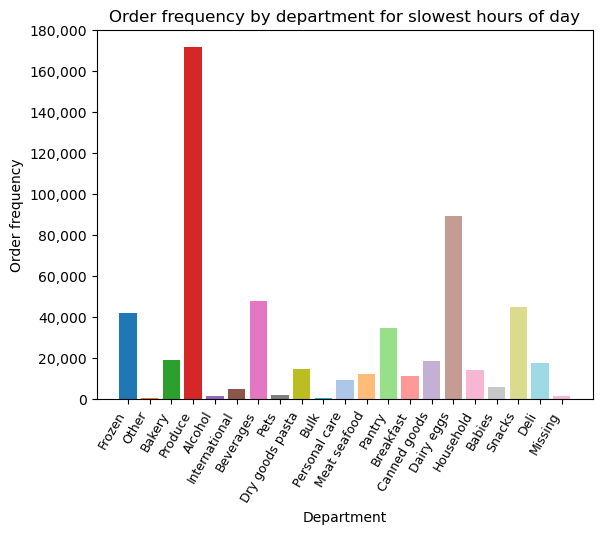

In [124]:
# Create a bar chart for order frequency by department

# Aggregate orders by department
dept_order_counts2 = slow_hours['department_id'].value_counts().sort_index().reset_index()
dept_order_counts2.columns = ['department_id', 'order_frequency']

# Create bar chart with department-specific colors
x_pos = np.arange(len(dept_order_counts2))
bar_pos = x_pos + 1

bar_ords_dep2 = plt.bar(
    bar_pos,
    dept_order_counts2['order_frequency'],
    color=[dept_colors[did] for did in dept_order_counts2['department_id']],
    width=0.8,
    align='center'
    )

bar_ords_dep2=plt.gca()

# Formatting
bar_ords_dep2.ticklabel_format(style='plain', axis='y')
bar_ords_dep2.yaxis.set_major_locator(mxn(integer=False))
bar_ords_dep2.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

# Set x-ticks and labels
bar_ords_dep2.set_xticks(x_pos - 0.1)
bar_ords_dep2.set_xticks(range(1, 22))
labels = [dept_names.get(i, str(i)) for i in range(1, 22)]
bar_ords_dep2.set_xticklabels(labels, rotation=60, ha='right', fontsize=9)
bar_ords_dep2.set_xlabel('Department')
bar_ords_dep2.set_ylabel('Order frequency')
bar_ords_dep2.set_title('Order frequency by department for slowest hours of day')

plt.show()

In [125]:
bar_ords_dep2.figure.savefig((os.path.join(path, '04 Analysis','Visualizations', 'bar_ords_dep_slow.png')), bbox_inches='tight')

In [219]:
# Create a high_spender subset to determine in what departments they shop the most

high_spender = ords_prods_regcusts[ords_prods_regcusts['spending_flag']=='High spender']
high_spender.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,avg_days_prior_order,frequency_flag,gender,state,age,n_dependants,fam_status,income,region,demographics
9425,2451656,72,1,5,15,NaN,38689,1,0,Organic Reduced Fat Milk,...,16.04878,Regular customer,Male,Montana,30,1,married,57772,West,Married young father
9426,2451656,72,1,5,15,NaN,32553,2,0,"Country Stand Juice, Medium Pulp",...,16.04878,Regular customer,Male,Montana,30,1,married,57772,West,Married young father
9427,2451656,72,1,5,15,NaN,46906,3,0,Grape White/Green Seedless,...,16.04878,Regular customer,Male,Montana,30,1,married,57772,West,Married young father
9428,2451656,72,1,5,15,NaN,27992,4,0,Unbleached Recycled Paper Towel Rolls,...,16.04878,Regular customer,Male,Montana,30,1,married,57772,West,Married young father
9429,2451656,72,1,5,15,NaN,26369,5,0,Organic Roma Tomato,...,16.04878,Regular customer,Male,Montana,30,1,married,57772,West,Married young father


In [225]:
high_spender.agg({'order_number': ['mean', 'min', 'max'], 'prices': ['mean', 'min', 'max'], 'n_dependants': ['mean', 'min', 'max'], 'income': ['mean', 'min', 'max']})

,order_number,prices,n_dependants,income
mean,11.657359,10.563602,1.474123,106329.794588
min,1.000000,1.000000,0.000000,41746.000000
max,99.000000,25.000000,3.000000,430161.000000


In [229]:
high_spender['product_name'].agg(pd.Series.mode)

0    Banana
Name: product_name, dtype: object

In [230]:
high_spender.groupby('demographics')['product_name'].agg(pd.Series.mode)

demographics
Married adult father                                                           Banana
Married adult mother                                               Organic Whole Milk
Married older man                                                              Banana
Married older woman                                                            Banana
Married young father                                                           Banana
Married young mother                                           Bag of Organic Bananas
Single/div/wid adult man no child                        [Banana, Organic Whole Milk]
Single/div/wid adult woman no child                                            Banana
Single/div/wid young man no child                                              Banana
Single/div/wid young woman no child                                            Banana
Single/div/widow older man                                       Organic Baby Spinach
Single/div/widow older woman           Un

In [231]:
high_spender.groupby('demographics')['department_id'].agg(pd.Series.mode)

demographics
Married adult father                   4
Married adult mother                   4
Married older man                      4
Married older woman                    4
Married young father                   4
Married young mother                   4
Single/div/wid adult man no child      4
Single/div/wid adult woman no child    4
Single/div/wid young man no child      4
Single/div/wid young woman no child    4
Single/div/widow older man             4
Single/div/widow older woman           4
Young father living with parents       4
Young mother living with parents       4
Name: department_id, dtype: int64

In [233]:
high_spender.agg({'order_number': 'mean', 'prices': 'mean', 'n_dependants': 'mean', 'income': 'mean'})

order_number        11.657359
prices              10.563602
n_dependants         1.474123
income          106329.794588
dtype: float64

In [244]:
crosstab_spend_flag = ords_prods_regcusts.groupby('spending_flag').agg({'order_number': 'mean', 'prices': 'mean', 'n_dependants': 'mean', 'income': 'mean'})
crosstab_spend_flag

,order_number,prices,n_dependants,income
spending_flag,,,,
High spender,11.657359,10.563602,1.474123,106329.794588
Low spender,17.853641,7.781727,1.501907,99654.859622


In [53]:
crosstab_spend_flag2 = ords_prods_regcusts.groupby(['spending_flag','demographics'])['product_name'].agg(pd.Series.mode).reset_index()
crosstab_spend_flag2.columns = ['spending_flag','demographics','product_name']
crosstab_spend_flag2.to_clipboard()
crosstab_spend_flag2

,spending_flag,demographics,product_name
0,High spender,Married adult father,Banana
1,High spender,Married adult mother,Organic Whole Milk
2,High spender,Married older man,Banana
3,High spender,Married older woman,Banana
4,High spender,Married young father,Banana
5,High spender,Married young mother,Bag of Organic Bananas
6,High spender,Single/div/wid adult man no child,"[Banana, Organic Whole Milk]"
7,High spender,Single/div/wid adult woman no child,Banana
8,High spender,Single/div/wid young man no child,Banana
9,High spender,Single/div/wid young woman no child,Banana


In [232]:
high_spender.groupby('demographics').agg({'order_number': 'mean', 'prices': 'mean', 'n_dependants': 'mean', 'income': 'mean'})

,order_number,prices,n_dependants,income
demographics,,,,
Married adult father,10.797050,10.521000,2.007404,112524.809876
Married adult mother,11.213665,10.608057,2.071353,115333.278502
Married older man,9.479964,10.643182,1.986599,127468.125943
Married older woman,15.085891,10.449815,2.072909,117726.155963
Married young father,9.595823,10.656040,2.042941,69404.186132
Married young mother,11.153175,10.506534,2.086640,71474.648413
Single/div/wid adult man no child,16.254102,10.553901,0.000000,116278.336026
Single/div/wid adult woman no child,11.962129,10.656892,0.000000,122096.591948
Single/div/wid young man no child,10.792695,10.575905,0.000000,67543.569369


In [243]:
# Get the mode of 'department_id' for each demographic.

ords_prods_regcusts.groupby(['demographics','region'])['department_id'].agg(pd.Series.mode)

demographics                         region   
Married adult father                 Midwest      4
                                     Northeast    4
                                     South        4
                                     West         4
Married adult mother                 Midwest      4
                                     Northeast    4
                                     South        4
                                     West         4
Married older man                    Midwest      4
                                     Northeast    4
                                     South        4
                                     West         4
Married older woman                  Midwest      4
                                     Northeast    4
                                     South        4
                                     West         4
Married young father                 Midwest      4
                                     Northeast    4
                 

In [254]:
# Get the mode of 'department_id' for each demographic.

pd.options.display.max_rows = None
ords_prods_regcusts.groupby(['department_id','region'])['demographics'].agg(pd.Series.mode)

department_id  region   
1              Midwest      Married adult mother
               Northeast    Married adult father
               South        Married adult father
               West         Married adult father
2              Midwest      Married adult father
               Northeast    Married adult father
               South        Married adult mother
               West         Married adult mother
3              Midwest      Married adult mother
               Northeast    Married adult father
               South        Married adult father
               West         Married adult mother
4              Midwest      Married adult mother
               Northeast    Married adult father
               South        Married adult father
               West         Married adult mother
5              Midwest      Married adult father
               Northeast    Married adult mother
               South        Married adult mother
               West         Married adult mo

In [255]:
ords_prods_regcusts.groupby(['department_id'])['demographics'].agg(pd.Series.mode)

department_id
1     Married adult father
2     Married adult mother
3     Married adult mother
4     Married adult father
5     Married adult mother
6     Married adult father
7     Married adult father
8     Married adult father
9     Married adult father
10    Married adult mother
11    Married adult father
12    Married adult father
13    Married adult father
14    Married adult mother
15    Married adult father
16    Married adult father
17    Married adult father
18    Married adult father
19    Married adult father
20    Married adult father
21    Married adult father
Name: demographics, dtype: object

In [244]:
# Get the mode of 'frequency_flag' for each demographic.

ords_prods_regcusts.groupby(['demographics','region'])['frequency_flag'].agg(pd.Series.mode)

demographics                         region   
Married adult father                 Midwest      Frequent customer
                                     Northeast    Frequent customer
                                     South        Frequent customer
                                     West         Frequent customer
Married adult mother                 Midwest      Frequent customer
                                     Northeast    Frequent customer
                                     South        Frequent customer
                                     West         Frequent customer
Married older man                    Midwest      Frequent customer
                                     Northeast    Frequent customer
                                     South        Frequent customer
                                     West         Frequent customer
Married older woman                  Midwest      Frequent customer
                                     Northeast    Frequent customer
 

In [256]:
ords_prods_regcusts.groupby('frequency_flag')['demographics'].agg(pd.Series.mode)

frequency_flag
Frequent customer        Married adult father
Non-frequent customer    Married adult father
Regular customer         Married adult father
Name: demographics, dtype: object

In [245]:
# Get the mode of 'spending_flag' for each demographic.

ords_prods_regcusts.groupby(['demographics','region'])['spending_flag'].agg(pd.Series.mode)

demographics                         region   
Married adult father                 Midwest      Low spender
                                     Northeast    Low spender
                                     South        Low spender
                                     West         Low spender
Married adult mother                 Midwest      Low spender
                                     Northeast    Low spender
                                     South        Low spender
                                     West         Low spender
Married older man                    Midwest      Low spender
                                     Northeast    Low spender
                                     South        Low spender
                                     West         Low spender
Married older woman                  Midwest      Low spender
                                     Northeast    Low spender
                                     South        Low spender
                       

In [257]:
ords_prods_regcusts.groupby('spending_flag')['demographics'].agg(pd.Series.mode)

spending_flag
High spender    Married adult father
Low spender     Married adult father
Name: demographics, dtype: object

In [85]:
spend_habits_dem = ords_prods_regcusts.groupby('demographics').agg({'order_number': 'mean', 'days_since_prior_order': 'mean', 'prices': 'mean', 'n_dependants': 'mean', 'income': 'mean'}).reset_index()
spend_habits_dem.columns = ['region', 'avg_orders', 'avg_days_btw_ord', 'avg_price', 'avg_dependants', 'avg_income']
spend_habits_dem.to_clipboard()
spend_habits_dem

,region,avg_orders,avg_days_btw_ord,avg_price,avg_dependants,avg_income
0,Married adult father,17.678591,10.860045,7.799271,1.991759,106602.782145
1,Married adult mother,17.867666,10.810794,7.782945,2.009451,107288.585473
2,Married older man,17.726979,10.829879,7.795898,2.003260,115152.345843
3,Married older woman,17.810133,10.768569,7.793862,2.003793,116331.421367
4,Married young father,17.863617,10.761329,7.779031,2.015591,70244.881095
5,Married young mother,17.748954,10.869809,7.784353,2.003564,70687.651239
6,Single/div/wid adult man no child,18.190900,10.739698,7.781588,0.000000,107096.863957
7,Single/div/wid adult woman no child,18.146543,10.752922,7.793203,0.000000,107596.489923
8,Single/div/wid young man no child,17.695420,10.920124,7.780172,0.000000,70724.373948
9,Single/div/wid young woman no child,17.713353,10.870592,7.781704,0.000000,70589.163741


In [153]:
# Get the mode of 'orders_day_of_week' for each demographic.

crosstab_dow = ords_prods_regcusts.groupby(['demographics'])['orders_day_of_week'].agg(pd.Series.mode)
crosstab_dow.to_clipboard()
crosstab_dow

demographics
Married adult father                   0
Married adult mother                   0
Married older man                      0
Married older woman                    0
Married young father                   0
Married young mother                   0
Single/div/wid adult man no child      0
Single/div/wid adult woman no child    0
Single/div/wid young man no child      0
Single/div/wid young woman no child    0
Single/div/widow older man             0
Single/div/widow older woman           0
Young father living with parents       0
Young mother living with parents       0
Name: orders_day_of_week, dtype: int64

In [152]:
ords_prods_regcusts.groupby(['demographics', 'region'])['orders_day_of_week'].agg(pd.Series.mode)

demographics                         region   
Married adult father                 Midwest      0
                                     Northeast    0
                                     South        0
                                     West         0
Married adult mother                 Midwest      0
                                     Northeast    0
                                     South        0
                                     West         0
Married older man                    Midwest      0
                                     Northeast    0
                                     South        0
                                     West         0
Married older woman                  Midwest      0
                                     Northeast    0
                                     South        0
                                     West         0
Married young father                 Midwest      0
                                     Northeast    0
                 

In [149]:
# Get the mode of 'order_hour_of_day' for each demographic.

crosstab_hour =ords_prods_regcusts.groupby(['demographics'])['order_hour_of_day'].agg(pd.Series.mode)
crosstab_hour.to_clipboard()
crosstab_hour

demographics
Married adult father                   10
Married adult mother                   10
Married older man                      10
Married older woman                    10
Married young father                   10
Married young mother                   10
Single/div/wid adult man no child      10
Single/div/wid adult woman no child    10
Single/div/wid young man no child      15
Single/div/wid young woman no child    11
Single/div/widow older man             11
Single/div/widow older woman           10
Young father living with parents       11
Young mother living with parents       10
Name: order_hour_of_day, dtype: int64

#### Customers demonstrate similar behaviours accross demographics and regions. 
#### The most commonly purchased products are bananas, with single/divorced/widowed older men from the Northeast prefering organic bananas, from the produce department. 
#### All customers purchase the most from the produce department, on Saturdays (with few demograpics prefering Sundays), mostly between 10 and 11 am (except for single young men with no child, who tend to shop at 3pm). 
#### The demographic that shops the most in all departments, and all frequency and price ranges, are married adult parents, fathers in particular. Married mothers are the most frequent buyers at the bakery, alcohol, bulk, breakfast, and 'other' departments. 
#### The majority of users are frequent customers but low spenders, buying products with an average price of $7.7 - 7.8 and an average of 10 days between orders. Income diferences don't impact spending habits.